In [6]:
import numpy as np
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [7]:
def get_unique_skill_lv(req_skill_tasks: dict):
    unique_skill_lvs = []
    for _, req_skill in req_skill_tasks.items():
       unique_skill_lvs.extend(list(req_skill.keys()))
    return set(unique_skill_lvs)


def mapping_skill(workforce_skills, req_skill):
    return [req_skill.get(skill, 0 ) for skill in workforce_skills]


def convert_skill_task2vec(req_skills, workforce_skills):
    task_names = []
    skill_task_vectors = []
    for task_name, req_skill in req_skills.items():
        skill_task_vectors.append(mapping_skill(req_skill=req_skill, workforce_skills=workforce_skills))
        task_names.append(task_name)
    
    return task_names, skill_task_vectors


def calculate_similarity(req_skill_matrix):
    cosine_similariries = cosine_similarity(req_skill_matrix)
    euclid_similarities = []
    for i in range(len(req_skill_matrix)):
        _row = []
        for j in range(len(req_skill_matrix)):
            customize_euclid = max(1, np.linalg.norm(req_skill_matrix[j] - req_skill_matrix[i]))
            _row.append(customize_euclid)
        euclid_similarities.append(_row)

    return cosine_similariries/euclid_similarities



In [8]:
req_skill_tasks = {
    "design_database": {
        "backend_lv": 3,
        "fontend_lv": 1
    },
    "design_fontend": {
        "fontend_lv": 2,
        "desginer_lv": 4

    },
    "design_architecture": {
        "backend_lv": 3,
        "fontend_lv": 3,
        "desginer_lv": 3

    },

    "implement_func_1": {
        "fontend_lv": 2,
        "backend_lv": 3

    },
    "implement_func_2": {
        "fontend_lv": 2,
        "backend_lv": 1

    },

    "implement_func_3": {
        "fontend_lv": 2,
        "backend_java_lv": 3,
        "backend_python_lv": 3,
        "backend_c#_lv": 3,
        "backend_lv": 3

    },


    "test_1": {
        "tester_lv": 2,
        "backend_lv": 3

    },
    
}

In [9]:
req_skill_tasks

{'design_database': {'backend_lv': 3, 'fontend_lv': 1},
 'design_fontend': {'fontend_lv': 2, 'desginer_lv': 4},
 'design_architecture': {'backend_lv': 3, 'fontend_lv': 3, 'desginer_lv': 3},
 'implement_func_1': {'fontend_lv': 2, 'backend_lv': 3},
 'implement_func_2': {'fontend_lv': 2, 'backend_lv': 1},
 'implement_func_3': {'fontend_lv': 2,
  'backend_java_lv': 3,
  'backend_python_lv': 3,
  'backend_c#_lv': 3,
  'backend_lv': 3},
 'test_1': {'tester_lv': 2, 'backend_lv': 3}}

In [12]:
 convert_skill_task2vec(req_skill_tasks, workforce_skills=get_unique_skill_lv(req_skill_tasks))

(['design_database',
  'design_fontend',
  'design_architecture',
  'implement_func_1',
  'implement_func_2',
  'implement_func_3',
  'test_1'],
 [[1, 0, 0, 0, 0, 0, 3],
  [2, 4, 0, 0, 0, 0, 0],
  [3, 3, 0, 0, 0, 0, 3],
  [2, 0, 0, 0, 0, 0, 3],
  [2, 0, 0, 0, 0, 0, 1],
  [2, 0, 3, 0, 3, 3, 3],
  [0, 0, 0, 2, 0, 0, 3]])

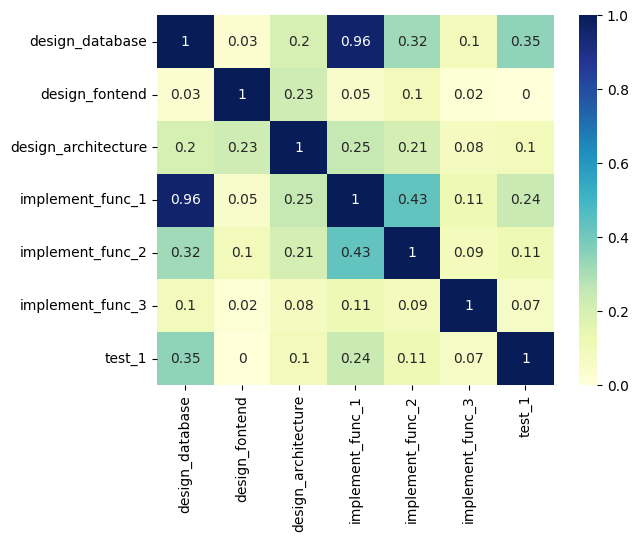

<Figure size 1000x600 with 0 Axes>

In [10]:
task_names, skill_task_vectors = convert_skill_task2vec(req_skill_tasks, workforce_skills=get_unique_skill_lv(req_skill_tasks))
similarity_matrix = calculate_similarity(np.array(skill_task_vectors))


# Create a heatmap using Seaborn
sns.heatmap(
    np.round(similarity_matrix, 2), 
    annot=True, 
    cmap="YlGnBu", 
    xticklabels=task_names, 
    yticklabels=task_names)


# Set up the figure size
plt.figure(figsize=(10, 6))

# Display the heatmap

plt.show()